### SVR_Assignment

### Problem Statement

 The problem defines the we need to consturuct regression model which can predict the Admission to univerty based on GRE and TOFEL score

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
data.shape

(500, 8)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


As wea can observe there is not __Null Values__ in the data.

__Chance of Admit__ is the target variable

__Serial No.__ is just serial number doen't provide any scope to the data.so we can drop this featuer

In [4]:
data.drop('Serial No.',axis=1,inplace=True)

In [5]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


__All data in the dataframe are float or integers__

## Graphical analysis

In [12]:
data.nunique()

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

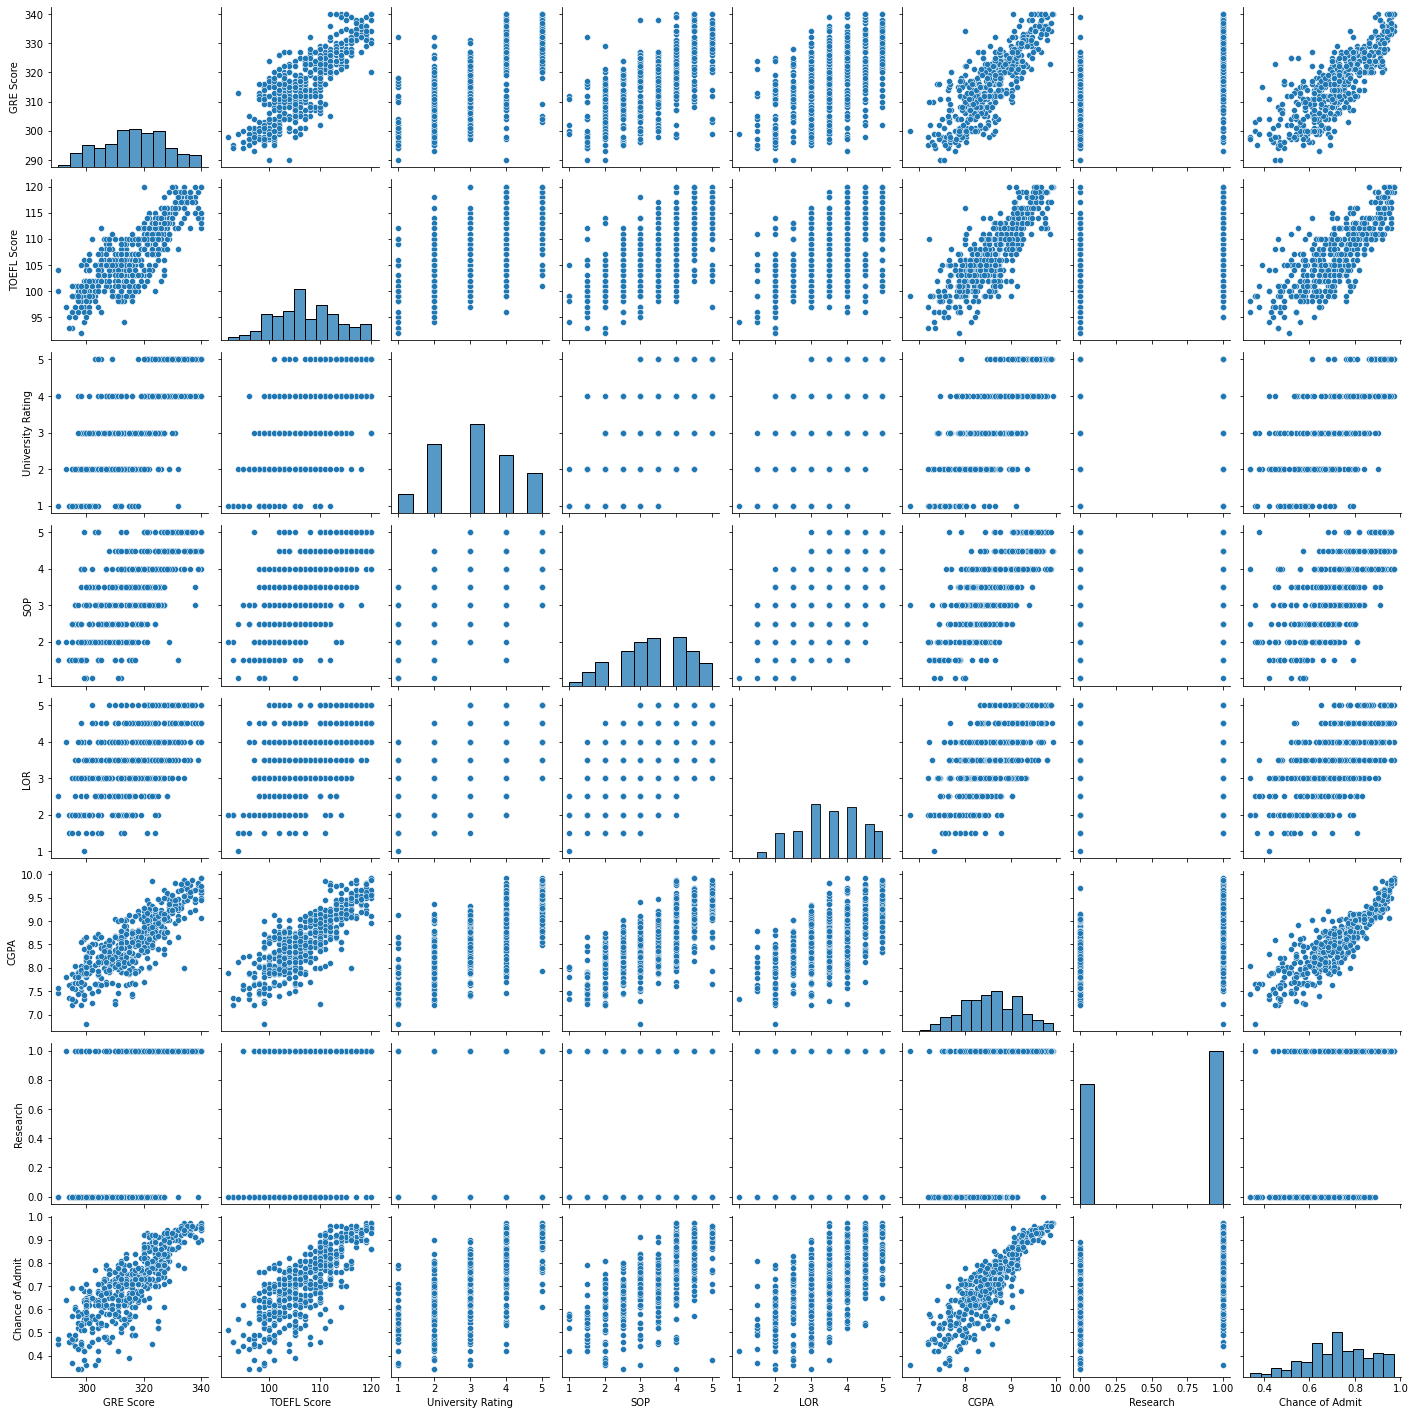

In [13]:
sns.pairplot(data)

In [25]:
num_feature  = [i for i in data.columns if data.nunique()[i] > 9]
num_feature

['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit ']

In [26]:
cat_feature = [i for i in data.columns if i not in num_feature]
cat_feature

['University Rating', 'SOP', 'LOR ', 'Research']

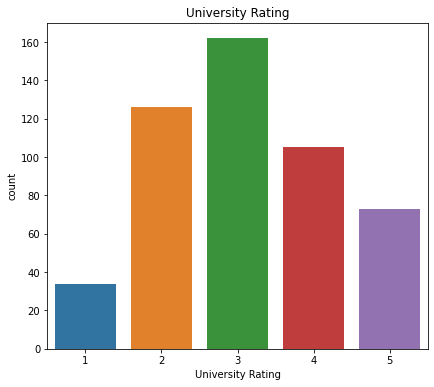

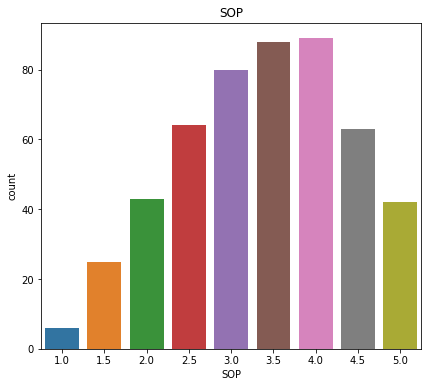

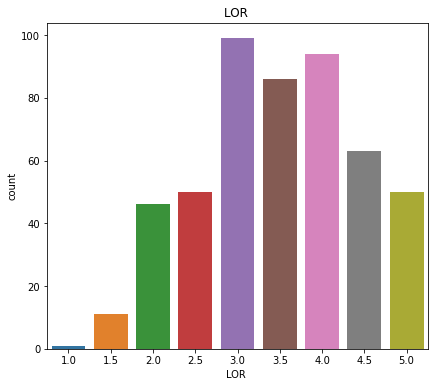

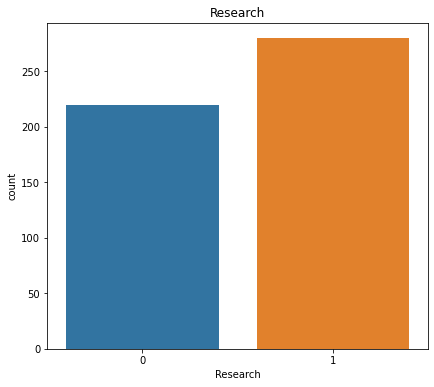

In [28]:
for i in range(len(cat_feature)):
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.countplot(data = data, x = cat_feature[i])
    plt.title('{}'.format(cat_feature[i]))
    plt.show()

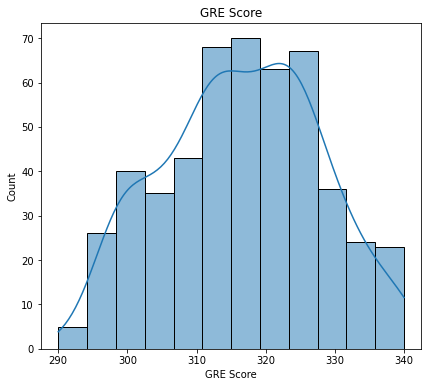

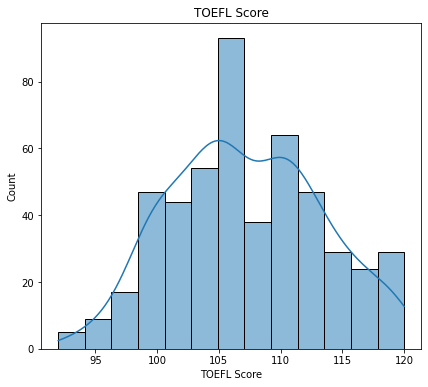

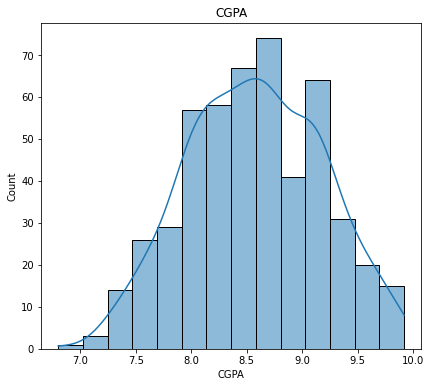

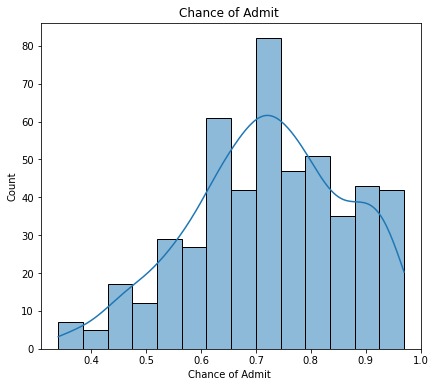

In [29]:
for i in num_feature:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.histplot(data= data,x= i,kde=True)
    plt.title('{}'.format(i))
    plt.show()

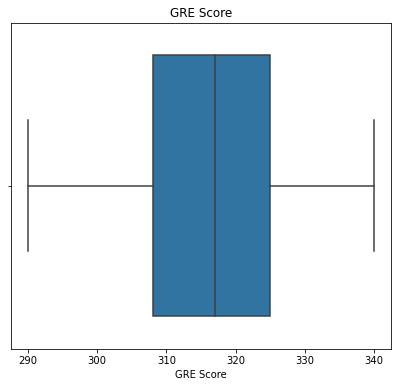

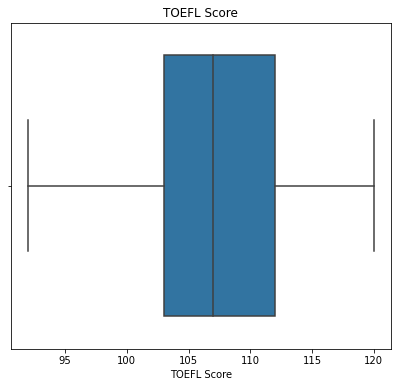

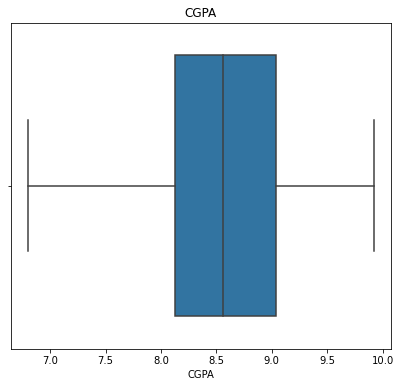

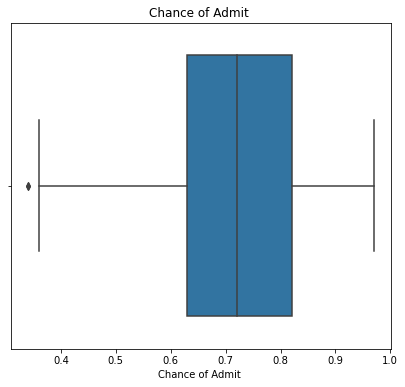

In [31]:
for i in num_feature:
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.boxplot(data= data,x= i)
    plt.title('{}'.format(i))
    plt.show()

Almost all the numerical features are normally distributed and no outliers values 

### Bivariate analysis

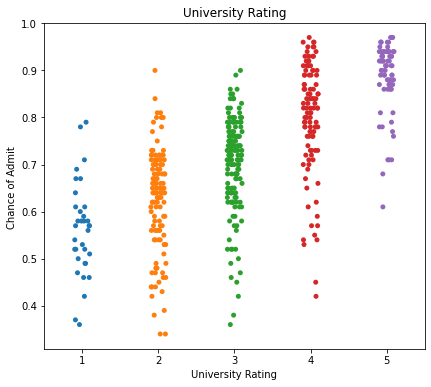

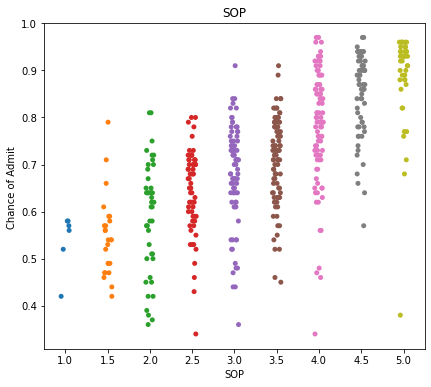

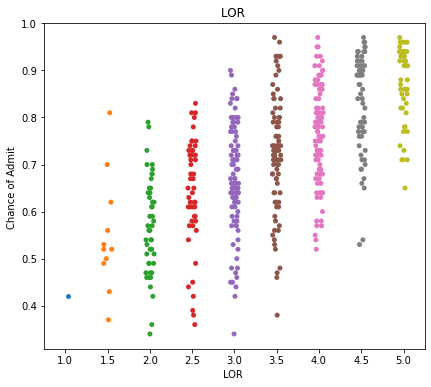

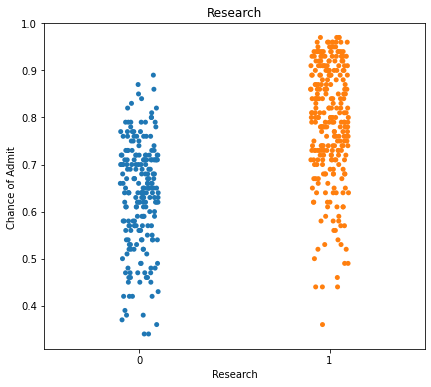

In [32]:
for i in range(len(cat_feature)):
    plt.figure(figsize=(15,6))
    plt.subplot(121)
    sns.stripplot(data = data, x = cat_feature[i],y='Chance of Admit ')
    plt.title('{}'.format(cat_feature[i]))
    plt.show()

In [33]:
##correlation 
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<AxesSubplot:>

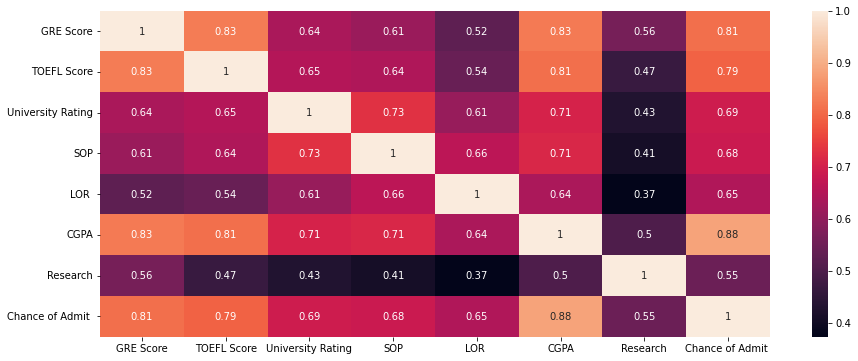

In [35]:
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(),annot=True)

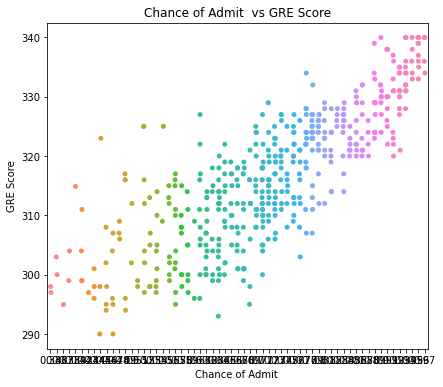

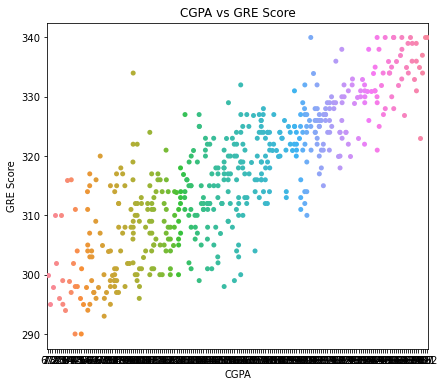

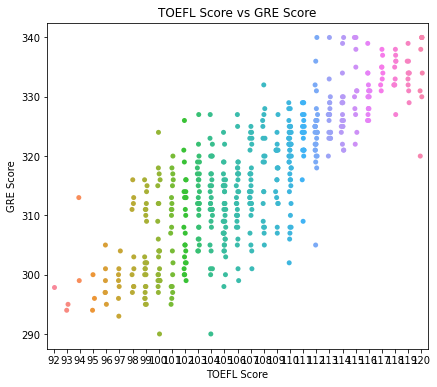

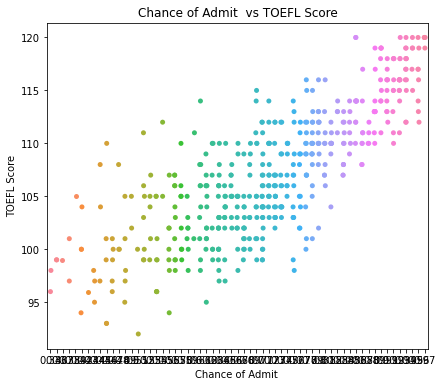

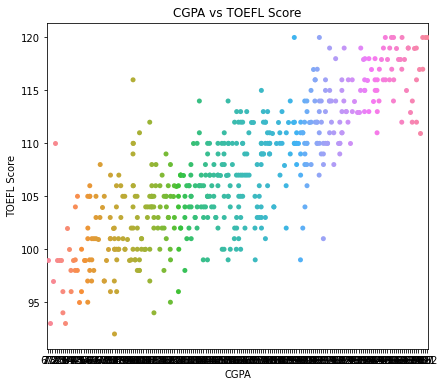

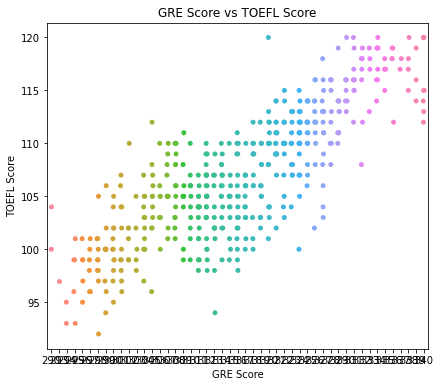

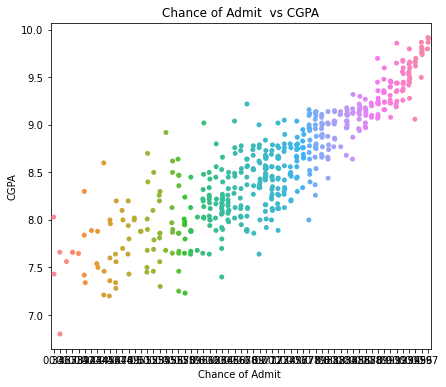

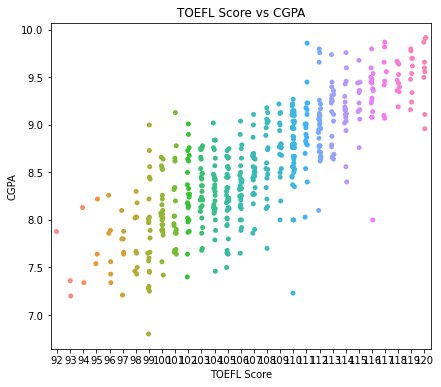

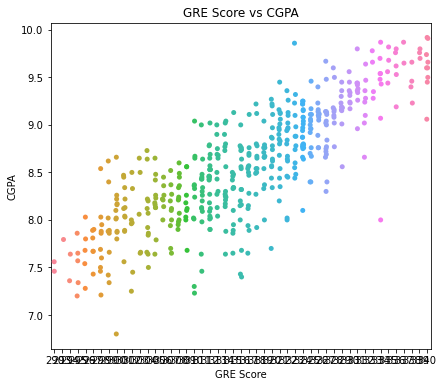

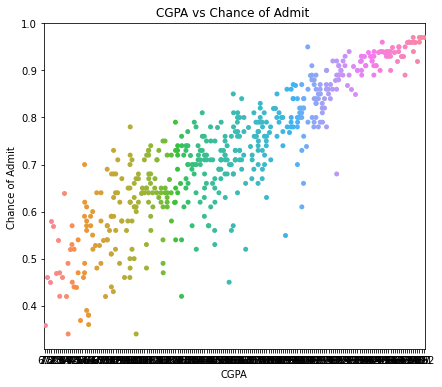

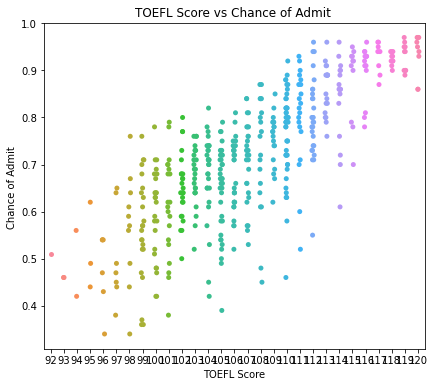

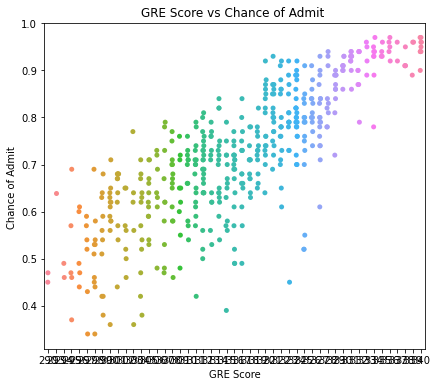

In [38]:
for i in num_feature:
    for j in num_feature[::-1]:
        if j!= i:
            plt.figure(figsize=(15,6))
            plt.subplot(121)
            sns.stripplot(data = data, x = j,y=i)
            plt.title('{} vs {}'.format(j, i))
            plt.show()  

__Observation report__

1. The all numerical feature are having linear relationship with target feature
2. No null values and no outliers
3. CGPA, Tofel score and GRE score has highest correlation with target featuer
4. Tofel and GRE has quite good +ve correaltion
5. The University having the rating 3 and 4 are more likely get admitted than 5
6. The University has the research facility has more likely get admitted
7. SOP and LOR are almost same effect of chance of getting admitted.

## Modeling 

In [40]:
# first we split the data
from sklearn.model_selection import train_test_split


In [41]:
X = data.drop('Chance of Admit ',axis=1)
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [42]:
y = data['Chance of Admit ']
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [44]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
471,311,103,3,2.0,4.0,8.09,0
26,322,109,5,4.5,3.5,8.80,0
7,308,101,2,3.0,4.0,7.90,0
453,319,103,3,2.5,4.0,8.76,1
108,331,116,5,5.0,5.0,9.38,1


In [45]:
y_train.head()

471    0.64
26     0.76
7      0.68
453    0.73
108    0.93
Name: Chance of Admit , dtype: float64

In [46]:
print(len(X_train),len(y_train))
print(len(X_test),len(y_test))

335 335
165 165


In [47]:
# the data is at differnt scale so there is necessity to bring to single scale we use StandradScaler
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()

In [49]:
scaler.fit(X_train)

StandardScaler()

In [50]:
scaler.mean_

array([316.7641791 , 107.31343284,   3.09552239,   3.38059701,
         3.50149254,   8.58498507,   0.56716418])

In [51]:
X_train_tf = scaler.transform(X_train)
X_train_tf

array([[-5.25174731e-01, -7.06985745e-01, -8.28848674e-02, ...,
         5.38819022e-01, -8.35765678e-01, -1.14470294e+00],
       [ 4.77035981e-01,  2.76433873e-01,  1.65251704e+00, ...,
        -1.61323061e-03,  3.63045482e-01, -1.14470294e+00],
       [-7.98504925e-01, -1.03479228e+00, -9.50585823e-01, ...,
         5.38819022e-01, -1.15657430e+00, -1.14470294e+00],
       ...,
       [-1.34516531e+00, -1.36259882e+00, -1.81828678e+00, ...,
        -1.62290999e+00, -2.25407747e+00, -1.14470294e+00],
       [-7.07394861e-01, -3.79179206e-01, -9.50585823e-01, ...,
         5.38819022e-01, -1.52803691e+00, -1.14470294e+00],
       [-2.51844537e-01, -2.15275936e-01, -9.50585823e-01, ...,
        -1.61323061e-03, -5.65611050e-01, -1.14470294e+00]])

In [52]:
# model importing 
from sklearn.svm import SVR

In [53]:
model = SVR()

In [54]:
model.fit(X_train_tf,y_train)

SVR()

In [55]:
model.score(X_train_tf,y_train)

0.7757519357301843

In [56]:
X_test_tf = scaler.transform(X_test)
X_test_tf

array([[ 1.57035676e+00,  1.42375676e+00,  7.84816088e-01, ...,
        -1.61323061e-03,  1.61251063e+00,  8.73589088e-01],
       [-2.51844537e-01,  1.12530603e-01,  7.84816088e-01, ...,
         5.38819022e-01,  7.68277423e-01,  8.73589088e-01],
       [-1.60734472e-01, -3.79179206e-01, -9.50585823e-01, ...,
        -1.08247774e+00, -1.57869090e+00, -1.14470294e+00],
       ...,
       [-6.96244077e-02, -7.06985745e-01, -9.50585823e-01, ...,
         1.07925128e+00,  2.61737496e-01, -1.14470294e+00],
       [-6.16284796e-01, -1.36259882e+00, -9.50585823e-01, ...,
        -1.62290999e+00, -2.16965415e+00, -1.14470294e+00],
       [ 2.14856571e-02, -2.15275936e-01, -1.81828678e+00, ...,
        -1.61323061e-03, -1.57869090e+00,  8.73589088e-01]])

In [57]:
y_predict = model.predict(X_test_tf)

In [58]:
y_predict

array([0.86758693, 0.78401064, 0.58098697, 0.70575523, 0.79341922,
       0.84684761, 0.50224061, 0.68176766, 0.7890468 , 0.75740703,
       0.65423979, 0.70427289, 0.65291603, 0.87242604, 0.81192102,
       0.46349708, 0.78825361, 0.59120035, 0.49104457, 0.60340786,
       0.65592674, 0.61635369, 0.6936474 , 0.70124134, 0.72962268,
       0.58562002, 0.87484478, 0.83448662, 0.62548557, 0.72594558,
       0.55523603, 0.71151451, 0.57128054, 0.84876902, 0.62839779,
       0.68891659, 0.50715952, 0.88026673, 0.63306979, 0.68165443,
       0.86381144, 0.56125806, 0.63224004, 0.8569825 , 0.84865294,
       0.55755756, 0.89763628, 0.80955106, 0.73115395, 0.87475322,
       0.83025309, 0.52673652, 0.7129972 , 0.5005013 , 0.88352502,
       0.59844805, 0.85569749, 0.70625272, 0.68184095, 0.4847354 ,
       0.63242747, 0.65850305, 0.57102219, 0.6063961 , 0.45817298,
       0.57186897, 0.86583523, 0.85248887, 0.6354494 , 0.66025349,
       0.61181011, 0.72180601, 0.66233978, 0.56776826, 0.50365

In [59]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [61]:
print('mean square error: ',mean_squared_error(y_test,y_predict))
print('mean absolute error: ',mean_absolute_error(y_test,y_predict))
print('root mean square error: ',np.sqrt(mean_squared_error(y_test,y_predict)))

mean square error:  0.004940947816722297
mean absolute error:  0.057582184061892104
root mean square error:  0.0702918758941764


In [65]:
print('r^2 score :',r2_score(y_test,y_predict))

r^2 score : 0.7601877598637248


In [66]:
Adj_r2 = 1 - (1-r2_score(y_test, y_predict)) * (len(y)-1)/(len(y)-X.shape[1]-1)

In [82]:
print('Adj r^2 score :',Adj_r2)

Adj r^2 score : 0.7567757970975583


## Hyperprameter Tuening Using Grid search

In [85]:
from sklearn.model_selection import GridSearchCV

In [102]:
param_grid = {'C': [0.1, 1, 10], 
              'epsilon': [0.001,0.01, 0.1],
              'kernel': ['linear','rbf']}

In [103]:
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)


In [104]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END C=0.1, epsilon=0.001, kernel=linear;, score=0.715 total time=   0.1s
[CV 2/5] END C=0.1, epsilon=0.001, kernel=linear;, score=0.836 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.001, kernel=linear;, score=0.767 total time=   0.1s
[CV 4/5] END C=0.1, epsilon=0.001, kernel=linear;, score=0.779 total time=   0.1s
[CV 5/5] END C=0.1, epsilon=0.001, kernel=linear;, score=0.900 total time=   0.1s
[CV 1/5] END ..C=0.1, epsilon=0.001, kernel=rbf;, score=0.453 total time=   0.0s
[CV 2/5] END ..C=0.1, epsilon=0.001, kernel=rbf;, score=0.484 total time=   0.0s
[CV 3/5] END ..C=0.1, epsilon=0.001, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END ..C=0.1, epsilon=0.001, kernel=rbf;, score=0.449 total time=   0.0s
[CV 5/5] END ..C=0.1, epsilon=0.001, kernel=rbf;, score=0.497 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.01, kernel=linear;, score=0.712 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.01, kernel=li

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.001, 0.01, 0.1],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [105]:
print(grid.best_params_)

{'C': 0.1, 'epsilon': 0.001, 'kernel': 'linear'}


In [106]:
grid_predict = grid.predict(X_test)

In [107]:
print('mean square error: ',mean_squared_error(y_test,grid_predict))
print('mean absolute error: ',mean_absolute_error(y_test,grid_predict))
print('root mean square error: ',np.sqrt(mean_squared_error(y_test,grid_predict)))

mean square error:  0.003749307912638949
mean absolute error:  0.042689725811192986
root mean square error:  0.06123159243918901


In [108]:
print('r^2 score :',r2_score(y_test,grid_predict))

r^2 score : 0.8180248076193872


In [109]:
Adj_r2 = 1 - (1-r2_score(y_test, y_predict)) * (len(y)-1)/(len(y)-X.shape[1]-1)

In [110]:
print('Adj r^2 score :',Adj_r2)

Adj r^2 score : 0.7567757970975583


### After Hyperparameter tuening we got good accuracy 

# Thank you